In [1]:
%run fungsi_save.ipynb

In [2]:
#pilih data fitur masukan NN1
train_data = pd.read_csv('rev3_data_baru_norm_training.csv', sep=',',header=None)
train_data = train_data.values
post = pd.read_csv('data_feature1_pos.csv', sep=',',header=None)
post = np.int_(post)
total_features = np.size(train_data, axis=1)-3
print(total_features)
output_train_data = train_data[:,total_features] #output aja lym
output_train_data = np.int_(output_train_data)
train_data = train_data[:,:total_features]
train_data

29


array([[0.23290321, 0.1880663 , 0.80561347, ..., 0.71176292, 0.29021789,
        0.405438  ],
       [0.33876336, 0.21701657, 0.88720096, ..., 0.71985131, 0.84939207,
        0.852632  ],
       [0.14477051, 0.07823204, 0.90193096, ..., 0.73730247, 0.72618649,
        0.593281  ],
       ...,
       [0.43478703, 0.29436464, 0.82699077, ..., 0.58111237, 0.78983127,
        0.965812  ],
       [0.43482695, 0.20640884, 0.95507519, ..., 0.58083608, 0.67863338,
        0.633993  ],
       [0.28595488, 0.25281768, 0.46894224, ..., 0.11345727, 0.17694923,
        0.561331  ]])

In [3]:
output_train_data

array([0, 1, 1, ..., 1, 0, 0])

In [4]:
np.size(train_data,axis=0)

1390

In [5]:
post

array([[0],
       [0],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [1],
       [1],
       [0],
       [0],
       [0],
       [1],
       [1],
       [0],
       [1],
       [1],
       [1]])

In [6]:
a = [] #index fitur yang gak kepake
for i in range(len(post)):
    if post[i,0] == 0:
        a.append(i)
a

[0, 1, 10, 11, 12, 13, 14, 16, 17, 20, 21, 22, 25]

In [7]:
train_data = np.delete(train_data, a ,axis=1) #data fitur yang udah terseleksi
print("Number of training samples is", len(train_data))
print(np.size(train_data,axis=1))
print(train_data[0])

Number of training samples is 1390
16
[0.80561347 0.46743473 0.45973021 0.21574129 0.08051798 0.17391968
 0.28606383 0.61069057 0.764981   0.61649561 0.59072767 0.42035761
 0.29014588 0.71176292 0.29021789 0.405438  ]


In [8]:
#data validasi
validasi_data = pd.read_csv('rev3_data_baru_norm_testing.csv', sep=',',header=None)
validasi_data = validasi_data.values
output_validasi_data = validasi_data[:,total_features] #output aja untuk output 1
output_validasi_data = np.int_(output_validasi_data)
validasi_data = validasi_data[:,0:total_features] #fitur aja tanpa output dan fiturnya lengkap
validasi_data = np.delete(validasi_data, a ,axis=1) #data fitur yang udah terseleksi

#save_data1(test_data)

In [9]:
validasi_data.shape

(347, 16)

In [10]:
train_data

array([[0.80561347, 0.46743473, 0.45973021, ..., 0.71176292, 0.29021789,
        0.405438  ],
       [0.88720096, 0.36531283, 0.52423814, ..., 0.71985131, 0.84939207,
        0.852632  ],
       [0.90193096, 0.44159218, 0.86372303, ..., 0.73730247, 0.72618649,
        0.593281  ],
       ...,
       [0.82699077, 0.77574064, 0.41281102, ..., 0.58111237, 0.78983127,
        0.965812  ],
       [0.95507519, 0.91186202, 0.71174013, ..., 0.58083608, 0.67863338,
        0.633993  ],
       [0.46894224, 0.34618596, 0.35342718, ..., 0.11345727, 0.17694923,
        0.561331  ]])

In [11]:
n_inputs = np.size(train_data,1)
n_hidden = 20
n_classes = 2
n_inputs

16

In [12]:
def forward_prop(params):

    # Neural network architecture
    global n_inputs
    global n_hidden
    global n_classes

    w1_total = n_inputs*n_hidden
    b1_total = w1_total+n_hidden
    w2_total = b1_total+(n_hidden*n_classes)
    b2_total = w2_total+n_classes
    
    # Roll-back the weights and biases
    W1 = params[0:w1_total].reshape((n_inputs,n_hidden))
    b1 = params[w1_total:b1_total].reshape((n_hidden,))
    W2 = params[b1_total:w2_total].reshape((n_hidden,n_classes))
    b2 = params[w2_total:b2_total].reshape((n_classes,))

    # Perform forward propagation
    z1 = train_data.dot(W1) + b1  # Pre-activation in Layer 1
    a1 = np.tanh(z1)     # Activation in Layer 1 #belum pasti pake fungsi aktivasi apa
    z2 = a1.dot(W2) + b2 # Pre-activation in Layer 2
    logits = z2          # Logits for Layer 2
    #print(logits)
    #print(len(logits))

    # Compute for the softmax of the logits probabilitas per 2 output
    exp_scores = np.exp(logits)
    probs = exp_scores / np.sum(exp_scores, axis=1, keepdims=True)
    # Compute for the negative log likelihood #belum pasti loss functionnya pake apa
    N = len(train_data) # Number of samples
    corect_logprobs = -np.log(probs[range(N), output_train_data]) #logaritma natural
    
    loss = np.sum(corect_logprobs) / N
    return loss

In [13]:
def f(x):
    n_particles = x.shape[0]
    j = [forward_prop(x[i]) for i in range(n_particles)]
    return np.array(j)

In [14]:
# Initialize swarm
options = {'c1': 0.5, 'c2': 0.3, 'w': 0.9, 'k': 10, 'p': 2}

# Call instance of PSO
dimensions = (n_inputs * n_hidden) + (n_hidden * n_classes) + n_hidden + n_classes
optimizer = ps.single.LocalBestPSO(n_particles=20, dimensions=dimensions, options=options)

# Perform optimization
cost, pos = optimizer.optimize(f, iters=1000) #fungsi verbose dan print step error


2021-04-02 20:54:20,390 - pyswarms.single.local_best - INFO - Optimize for 1000 iters with {'c1': 0.5, 'c2': 0.3, 'w': 0.9, 'k': 10, 'p': 2}
pyswarms.single.local_best: 100%|███████████████████████████████████████████████████████████|1000/1000, best_cost=0.237
2021-04-02 20:55:39,779 - pyswarms.single.local_best - INFO - Optimization finished | best cost: 0.2368747317096195, best pos: [ 4.21195511e-01  3.42130658e-01  7.99067951e-02  4.07197021e-01
  5.79358121e-01 -3.86547163e-01  7.79281191e-01 -1.21085156e-01
  1.21785559e-02 -1.36232208e+00 -2.20224832e+00  3.52473814e-01
 -4.15342537e+00  8.03985435e-01  1.67552305e+00  2.66587205e-01
  1.63399422e+00  8.45987631e-01  2.18309759e+00  4.22680686e-01
  6.38167863e-01  3.02559561e-01  4.85842470e-01  1.26683944e+00
  7.07018901e-01 -1.83806379e-01  1.01586213e+00  4.57169887e+00
  1.05219741e+00  2.22888839e-01 -1.16003129e+00  1.34846118e+00
 -5.86651748e-01 -2.18030326e-01 -2.58050362e-01  5.70873671e-01
  9.40951129e-01  6.3025540

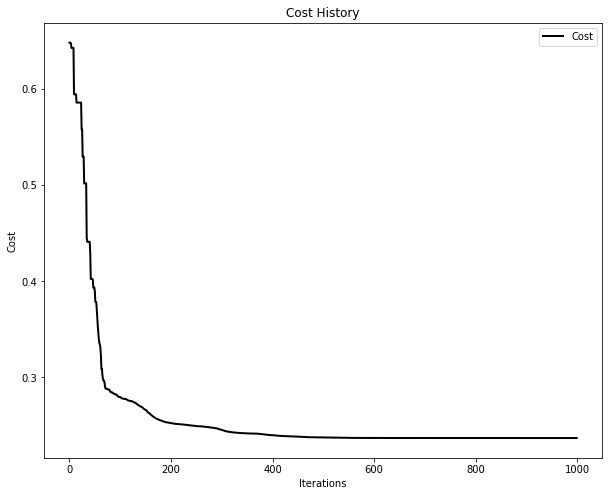

In [15]:
from pyswarms.utils.plotters import plot_cost_history
plot_cost_history(cost_history=optimizer.cost_history)
plt.show()

In [16]:
def predict(a, pos): #a = data training atau data test

    # Neural network architecture
    global n_inputs
    global n_hidden
    global n_classes

    w1_total = n_inputs*n_hidden
    b1_total = w1_total+n_hidden
    w2_total = b1_total+(n_hidden*n_classes)
    b2_total = w2_total+n_classes
    
    # Roll-back the weights and biases
    W1 = pos[0:w1_total].reshape((n_inputs,n_hidden))
    b1 = pos[w1_total:b1_total].reshape((n_hidden,))
    W2 = pos[b1_total:w2_total].reshape((n_hidden,n_classes))
    b2 = pos[w2_total:b2_total].reshape((n_classes,))
    save_params1(W1,b1,W2,b2)
    # Perform forward propagation
    z1 = a.dot(W1) + b1  # Pre-activation in Layer 1
    a1 = np.tanh(z1)     # fungsi aktivasi belum fix
    z2 = a1.dot(W2) + b2 # Pre-activation in Layer 2
    logits = z2          # Logits for Layer 2

    y_pred = np.argmax(logits, axis=1) #cari nilai terbesar per baris
    
    return y_pred

In [17]:
np.savetxt('hyperparameter.csv', pos, delimiter=",")

In [18]:
predict(validasi_data,pos)

array([1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1,
       1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1,
       1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0,
       0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1,
       1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0,
       1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1,
       0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1,
       1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0,
       0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1,

In [19]:
cm_train = confusion_matrix(output_train_data, predict(train_data, pos))
cm_validasi = confusion_matrix(output_validasi_data, predict(validasi_data, pos))
cm_train

array([[385,  91],
       [ 49, 865]], dtype=int64)

In [20]:
cm_validasi

array([[ 91,  40],
       [ 10, 206]], dtype=int64)

Normalized confusion matrix
[[0.81 0.19]
 [0.05 0.95]]
Normalized confusion matrix
[[0.69 0.31]
 [0.05 0.95]]


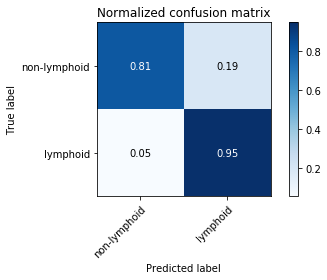

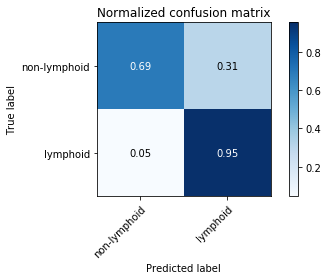

In [21]:
class_names = np.array(['non-lymphoid',"lymphoid"])
np.set_printoptions(precision=2)
cm_t = plot_confusion_matrix(output_train_data, predict(train_data, pos), classes=class_names, normalize=True,
                      title='Normalized confusion matrix')
cm_v = plot_confusion_matrix(output_validasi_data, predict(validasi_data, pos), classes=class_names, normalize=True,
                      title='Normalized confusion matrix')
plt.show()

In [22]:
cm_t.figure.savefig('rev3_train1.png')
cm_v.figure.savefig('rev3_validasi1.png')

In [23]:
print("Presisi data training limfoid : ", precision(1,cm_train))
print("Recall data training limfoid (sensitivitas) : ", recall(1,cm_train))
print("Presisi rerata data training : ", precision_macro_average(cm_train))
print("Presisi rerata data training : ", recall_macro_average(cm_train))
print("Akurasi data training : ", accuracy(cm_train))
print("F1 Score data training : ", f1_score(precision_macro_average(cm_train),recall_macro_average(cm_train)))

Presisi data training limfoid :  0.9048117154811716
Recall data training limfoid (sensitivitas) :  0.9463894967177243
Presisi rerata data training :  0.89595424483736
Presisi rerata data training :  0.8776065130647446
Akurasi data training :  0.8992805755395683
F1 Score data training :  0.8866854740373921


In [24]:
print("Presisi data validasi limfoid : ", precision(1,cm_validasi))
print("Recall data validasi limfoid : ", recall(1,cm_validasi))
print("Presisi rerata data validasi : ", precision_macro_average(cm_validasi))
print("Presisi rerata data validasi : ", recall_macro_average(cm_validasi))
print("Akurasi data validasi : ", accuracy(cm_validasi))
print("F1 Score data validasi : ", f1_score(precision_macro_average(cm_validasi),recall_macro_average(cm_validasi)))

Presisi data validasi limfoid :  0.8373983739837398
Recall data validasi limfoid :  0.9537037037037037
Presisi rerata data validasi :  0.8691942364968204
Presisi rerata data validasi :  0.824180096126661
Akurasi data validasi :  0.8559077809798271
F1 Score data validasi :  0.8460888718902925


In [25]:
pos2 = [i for i in pos]

In [26]:
#save_pos_step1('neuron_step1.csv',(n_hidden,optimizer.cost_history,accuracy(cm_train),accuracy(cm_validasi)))
save_pos_step1('perfo_step1.csv',("1",accuracy(cm_train),accuracy(cm_validasi),pos2,optimizer.cost_history,post))

In [27]:
test_data_complete = pd.read_csv('rev3_data_baru_norm_testing.csv', sep=',',header=None) #uji_T_data1
test_data_complete

,0,1,2,3,4,5,6,7,8,9,...,22,23,24,25,26,27,28,29,30,31
0,0.520423,0.408019,0.804339,0.694193,0.472455,0.549609,0.327182,0.385617,0.617747,0.311397,...,0.128458,0.829192,0.582733,0.319888,0.750431,0.826649,0.884281,1.0,1.0,1.0
1,0.540003,0.285714,0.958302,0.454899,0.851084,0.594697,0.191007,0.445306,0.626565,0.175771,...,0.067263,0.692066,0.744932,0.192636,0.802963,0.725587,0.746579,1.0,0.0,0.0
2,0.210973,0.455526,0.086209,0.584278,0.132226,0.161373,0.153763,0.242725,0.160888,0.850683,...,0.448799,0.162328,0.105329,0.438566,0.105343,0.105518,0.464215,0.0,2.0,0.0
3,0.487063,0.320418,0.895433,0.967190,0.650442,0.624242,0.125464,0.530090,0.552476,0.344388,...,0.123075,0.560521,0.548749,0.213458,0.584154,0.582853,0.856392,0.0,2.0,0.0
4,0.547975,0.407345,0.894719,0.534791,0.500562,0.584631,0.263675,0.531343,0.755719,0.210338,...,0.147952,0.761925,0.696203,0.340670,0.801036,0.775458,0.657895,1.0,1.0,1.0
5,0.369872,0.275943,0.909907,0.984241,0.617121,0.662380,0.183493,0.617230,0.586837,0.313262,...,0.200724,0.575289,0.581257,0.238815,0.598572,0.601549,0.769896,0.0,2.0,0.0
6,0.214945,0.126685,0.981947,0.846022,0.949542,0.673931,0.184532,0.430653,0.639006,0.249707,...,0.184382,0.808235,0.650803,0.138466,0.743573,0.837611,0.935992,1.0,0.0,0.0
7,0.252158,0.182278,0.922204,0.360634,0.742316,0.552754,0.262331,0.395436,0.680208,0.172088,...,0.293371,0.630412,0.746793,0.233010,0.759669,0.684079,0.490487,1.0,0.0,0.0
8,0.355529,0.236860,0.941407,0.811872,0.733181,0.346429,0.133793,0.317349,0.310667,0.632809,...,0.232053,0.482967,0.280943,0.087810,0.659005,0.363179,0.455701,1.0,0.0,0.0
9,0.535048,0.448113,0.895006,0.499580,0.412820,0.510400,0.214731,0.462305,0.614509,0.269914,...,0.094773,0.491057,0.627850,0.380346,0.733037,0.529274,0.924387,0.0,2.0,0.0


In [28]:
z = test_data_complete.values
z[0,:]

array([0.52, 0.41, 0.8 , 0.69, 0.47, 0.55, 0.33, 0.39, 0.62, 0.31, 0.34,
       0.52, 0.45, 0.13, 0.32, 0.37, 0.46, 0.12, 0.1 , 0.1 , 0.19, 0.83,
       0.13, 0.83, 0.58, 0.32, 0.75, 0.83, 0.88, 1.  , 1.  , 1.  ])

In [29]:
######milah yg outputnya masuk limfoid aja yang lolos
test2_data= [] #tes data fitur lengkap tapi yang lolos step 1 aja
for i in range(len(output_validasi_data)):
    if(predict(validasi_data, pos)[i] == 1):
        test2_data.append(z[i,:])
    else:
        continue

In [30]:
test2_data = np.array(test2_data)

In [31]:
test2_data.shape

(246, 32)

In [32]:
np.savetxt('rev3_data_testing_NN1.csv', test2_data, delimiter=",")

In [33]:
v = pd.read_csv('rev3_data_testing_NN1.csv', sep=',',header=None)
v

,0,1,2,3,4,5,6,7,8,9,...,22,23,24,25,26,27,28,29,30,31
0,0.520423,0.408019,0.804339,0.694193,0.472455,0.549609,0.327182,0.385617,0.617747,0.311397,...,0.128458,0.829192,0.582733,0.319888,0.750431,0.826649,0.884281,1.0,1.0,1.0
1,0.540003,0.285714,0.958302,0.454899,0.851084,0.594697,0.191007,0.445306,0.626565,0.175771,...,0.067263,0.692066,0.744932,0.192636,0.802963,0.725587,0.746579,1.0,0.0,0.0
2,0.487063,0.320418,0.895433,0.967190,0.650442,0.624242,0.125464,0.530090,0.552476,0.344388,...,0.123075,0.560521,0.548749,0.213458,0.584154,0.582853,0.856392,0.0,2.0,0.0
3,0.547975,0.407345,0.894719,0.534791,0.500562,0.584631,0.263675,0.531343,0.755719,0.210338,...,0.147952,0.761925,0.696203,0.340670,0.801036,0.775458,0.657895,1.0,1.0,1.0
4,0.369872,0.275943,0.909907,0.984241,0.617121,0.662380,0.183493,0.617230,0.586837,0.313262,...,0.200724,0.575289,0.581257,0.238815,0.598572,0.601549,0.769896,0.0,2.0,0.0
5,0.214945,0.126685,0.981947,0.846022,0.949542,0.673931,0.184532,0.430653,0.639006,0.249707,...,0.184382,0.808235,0.650803,0.138466,0.743573,0.837611,0.935992,1.0,0.0,0.0
6,0.252158,0.182278,0.922204,0.360634,0.742316,0.552754,0.262331,0.395436,0.680208,0.172088,...,0.293371,0.630412,0.746793,0.233010,0.759669,0.684079,0.490487,1.0,0.0,0.0
7,0.355529,0.236860,0.941407,0.811872,0.733181,0.346429,0.133793,0.317349,0.310667,0.632809,...,0.232053,0.482967,0.280943,0.087810,0.659005,0.363179,0.455701,1.0,0.0,0.0
8,0.535048,0.448113,0.895006,0.499580,0.412820,0.510400,0.214731,0.462305,0.614509,0.269914,...,0.094773,0.491057,0.627850,0.380346,0.733037,0.529274,0.924387,0.0,2.0,0.0
9,0.124159,0.078841,0.977200,0.421913,0.920083,0.378069,0.131006,0.281539,0.470589,0.392125,...,0.150565,0.634490,0.498494,0.105932,0.807483,0.650422,0.751503,1.0,0.0,0.0


In [34]:
#kalo mau pake data csv yang udah kesave

#W1 = pd.read_csv('W1_NN1.csv', sep=',',header=None)
#W1 = W1.values
#W2 = pd.read_csv('W2_NN1.csv', sep=',',header=None)
#W2 = W2.values
#b1 = pd.read_csv('b1_NN1.csv', sep=',',header=None)
#b1 = b1.values
#b2 = pd.read_csv('b2_NN1.csv', sep=',',header=None)
#b2 = b2.values
#train_data = pd.read_csv('data_training_NN1.csv', sep=',',header=None)
#train_data = train_data.values
#test_data = pd.read_csv('data_testing_NN1.csv', sep=',',header=None)
#test_data = test_data.values
#print(W1)
